In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 5)

import util

# Lecture 2 – Pandas 🐼

## DSC 80, Spring 2022

### Announcements

- Lab 1 is due on **Monday, April 4th at 11:59PM**.
    - Watch [this video 🎥](https://youtu.be/FpTo4AM9B30) for setup instructions.
- Discussion 1 is today from **7-7:50PM or 8-8:50PM** (in-person in PCNYH 122 or remote via Zoom).
    - There was a typo in the discussion times stated in Lecture 1.
    - Remember that discussion assignments can be submitted for extra credit!
- Don't forget to fill out the [Welcome + Alternate Exams Form](https://docs.google.com/forms/d/e/1FAIpQLSdBKLcPs4Xi0plaIw0MVZ0DyGcvnSZyHxKVC7S7LwEiCchepQ/viewform) by Monday as well.

### Agenda

- Wrap up our case study of City of San Diego employee salaries.
- Introduction to `pandas`.
    - DataFrames, Series, and Indexes.
- Selecting rows and columns using `[]` and `loc`. 

## The data science lifecycle

<center><img src="imgs/DSLC.png" width="40%"></center>

### Recap: City of San Diego salary data

Our dataset is downloaded from [Transparent California](https://transparentcalifornia.com/salaries/san-diego/).

In [2]:
salary_path = util.safe_download('https://transcal.s3.amazonaws.com/public/export/san-diego-2020.csv')

In [3]:
salaries = pd.read_csv(salary_path)
util.anonymize_names(salaries)
salaries

,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency,Status
0,Michael Xxxx,Police Officer,117691.0,187290.0,13331.00,36380.0,318312.0,354692.0,2020,NaN,San Diego,FT
1,Gary Xxxx,Police Officer,117691.0,160062.0,42946.00,31795.0,320699.0,352494.0,2020,NaN,San Diego,FT
2,Eric Xxxx,Fire Engineer,35698.0,204462.0,69121.00,38362.0,309281.0,347643.0,2020,NaN,San Diego,PT
3,Gregg Xxxx,Retirement Administrator,305000.0,0.0,12814.00,24792.0,317814.0,342606.0,2020,NaN,San Diego,FT
4,Joseph Xxxx,Fire Battalion Chief,94451.0,157778.0,48151.00,42096.0,300380.0,342476.0,2020,NaN,San Diego,FT
...,...,...,...,...,...,...,...,...,...,...,...,...
12600,Elena Xxxx,Asst Eng-Civil,0.0,2.0,0.00,0.0,2.0,2.0,2020,NaN,San Diego,PT
12601,Gary Xxxx,Police Officer,0.0,2.0,0.00,0.0,2.0,2.0,2020,NaN,San Diego,PT
12602,Sara Xxxx,Asst Planner,0.0,1.0,0.00,0.0,1.0,1.0,2020,NaN,San Diego,PT
12603,Kevin Xxxx,Project Ofcr 1,0.0,1.0,0.00,0.0,1.0,1.0,2020,NaN,San Diego,PT


### Question: Does gender influence pay?

- Do employees of different genders have similar pay?
- The salary dataset we downloaded does not contain employee gender, so we can't answer this question using just the data we have.

In [4]:
salaries.head()

,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency,Status
0,Michael Xxxx,Police Officer,117691.0,187290.0,13331.00,36380.0,318312.0,354692.0,2020,NaN,San Diego,FT
1,Gary Xxxx,Police Officer,117691.0,160062.0,42946.00,31795.0,320699.0,352494.0,2020,NaN,San Diego,FT
2,Eric Xxxx,Fire Engineer,35698.0,204462.0,69121.00,38362.0,309281.0,347643.0,2020,NaN,San Diego,PT
3,Gregg Xxxx,Retirement Administrator,305000.0,0.0,12814.00,24792.0,317814.0,342606.0,2020,NaN,San Diego,FT
4,Joseph Xxxx,Fire Battalion Chief,94451.0,157778.0,48151.00,42096.0,300380.0,342476.0,2020,NaN,San Diego,FT


- We **do**, however, have the first name of each employee.

### Social Security Administration baby names 👶

- The US Social Security Administration (SSA) keeps track of the **first name**, **birth year**, and **assigned gender at birth** for all babies born in the US.
- We can somehow combine the SSA's dataset with the `salaries` dataset to infer the gender of San Diego employees.

In [5]:
names_path = util.safe_download('https://www.ssa.gov/oact/babynames/names.zip')

In [6]:
import pathlib

dfs = []
for path in pathlib.Path('data/names/').glob('*.txt'):
    year = int(str(path)[14:18])
    if year >= 1964:
        df = pd.read_csv(path, names=['firstname', 'gender', 'count']).assign(year=year)
        dfs.append(df)
        
names = pd.concat(dfs)
names

,firstname,gender,count,year
0,Jennifer,F,56780,1971
1,Michelle,F,33161,1971
2,Lisa,F,32911,1971
3,Kimberly,F,30700,1971
4,Amy,F,26237,1971
...,...,...,...,...
19695,Zaki,M,5,1982
19696,Zebulin,M,5,1982
19697,Zedekiah,M,5,1982
19698,Zubin,M,5,1982


> We began compiling the baby name list in 1997, with names dating back to 1880. At the time of a child’s birth, parents supply the name to us when applying for a child’s Social Security card, thus making Social Security America’s source for the most popular baby names. Please share this with your friends and family—and help us spread the word on social media. - [Social Security’s Top Baby Names for 2020
](https://blog.ssa.gov/social-securitys-top-baby-names-for-2020/)

### Exploring `names`

- The only values of `'gender'` in `names` are `'M'` and `'F'`.
- Many names have non-zero counts for both `'M'` and `'F'`.
- Most names occur only a few times per year, but a few names occur very often.

In [7]:
names.head()

,firstname,gender,count,year
0,Jennifer,F,56780,1971
1,Michelle,F,33161,1971
2,Lisa,F,32911,1971
3,Kimberly,F,30700,1971
4,Amy,F,26237,1971


In [8]:
# Get the count of each unique value in the 'gender' column
names['gender'].value_counts()

F    838442
M    561304
Name: gender, dtype: int64

In [9]:
# Look at a single name
names[names['firstname'] == 'Billy']

,firstname,gender,count,year
1596,Billy,F,59,1971
9717,Billy,M,3907,1971
1738,Billy,F,42,1966
7698,Billy,M,4183,1966
1519,Billy,F,54,1965
...,...,...,...,...
10988,Billy,M,3157,1976
6725,Billy,F,13,1994
16008,Billy,M,1124,1994
2055,Billy,F,50,1982


In [10]:
# Look at various summary statistics
names.describe()

,count,year
count,1.399746e+06,1.399746e+06
mean,1.459451e+02,1.996861e+03
std,1.194298e+03,1.542586e+01
min,5.000000e+00,1.964000e+03
25%,7.000000e+00,1.985000e+03
50%,1.100000e+01,1.999000e+03
75%,3.000000e+01,2.010000e+03
max,8.529100e+04,2.020000e+03


### Data Modeling

<center><img src="imgs/DSLC.png" width="40%"></center>

### Determining the most common gender for each name

- Recall, our goal is to infer the gender of each San Diego city employee. To do this, we need a mapping of first names to genders.

- **A (very imperfect) model:** If someone has a name that is predominantly used by gender $g$, we'll infer their gender to be $g$.

- **Approach:** Create a DataFrame indexed by `'firstname'` that describes the total number of `'F'` and `'M'` babies in `names` for each unique `'firstname'`.
    - If there are more female babies born with a given name than male babies, we will "classify" the name as female.
    - Otherwise, we will classify the name as male.

### Determining the most common gender for each name

In [11]:
counts_by_gender = (
    names
    .groupby(['firstname', 'gender'])
    .sum()
    .reset_index()
    .pivot('firstname', 'gender', 'count')
    .fillna(0)
)
counts_by_gender

gender,F,M
firstname,,
Aaban,0.0,120.0
Aabha,46.0,0.0
Aabid,0.0,16.0
Aabidah,5.0,0.0
Aabir,0.0,10.0
...,...,...
Zyvion,0.0,5.0
Zyvon,0.0,7.0
Zyyanna,6.0,0.0


In [12]:
counts_by_gender['F'] > counts_by_gender['M']

firstname
Aaban      False
Aabha       True
Aabid      False
Aabidah     True
Aabir      False
           ...  
Zyvion     False
Zyvon      False
Zyyanna     True
Zyyon      False
Zzyzx      False
Length: 91360, dtype: bool

In [13]:
genders = counts_by_gender.assign(gender=np.where(counts_by_gender['F'] > counts_by_gender['M'], 'F', 'M'))
genders

gender,F,M,gender
firstname,,,
Aaban,0.0,120.0,M
Aabha,46.0,0.0,F
Aabid,0.0,16.0,M
Aabidah,5.0,0.0,F
Aabir,0.0,10.0,M
...,...,...,...
Zyvion,0.0,5.0,M
Zyvon,0.0,7.0,M
Zyyanna,6.0,0.0,F


### Adding a `'gender'` column to `salaries`

This involves two steps:
1. Extracting just the first name from `'Employee Name'`.
2. **Merging** `salaries` and `genders`.

In [14]:
# Add firstname column
salaries['firstname'] = salaries['Employee Name'].str.split().str[0]
salaries

,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency,Status,firstname
0,Michael Xxxx,Police Officer,117691.0,187290.0,13331.00,36380.0,318312.0,354692.0,2020,NaN,San Diego,FT,Michael
1,Gary Xxxx,Police Officer,117691.0,160062.0,42946.00,31795.0,320699.0,352494.0,2020,NaN,San Diego,FT,Gary
2,Eric Xxxx,Fire Engineer,35698.0,204462.0,69121.00,38362.0,309281.0,347643.0,2020,NaN,San Diego,PT,Eric
3,Gregg Xxxx,Retirement Administrator,305000.0,0.0,12814.00,24792.0,317814.0,342606.0,2020,NaN,San Diego,FT,Gregg
4,Joseph Xxxx,Fire Battalion Chief,94451.0,157778.0,48151.00,42096.0,300380.0,342476.0,2020,NaN,San Diego,FT,Joseph
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12600,Elena Xxxx,Asst Eng-Civil,0.0,2.0,0.00,0.0,2.0,2.0,2020,NaN,San Diego,PT,Elena
12601,Gary Xxxx,Police Officer,0.0,2.0,0.00,0.0,2.0,2.0,2020,NaN,San Diego,PT,Gary
12602,Sara Xxxx,Asst Planner,0.0,1.0,0.00,0.0,1.0,1.0,2020,NaN,San Diego,PT,Sara
12603,Kevin Xxxx,Project Ofcr 1,0.0,1.0,0.00,0.0,1.0,1.0,2020,NaN,San Diego,PT,Kevin


In [15]:
# Merge salaries and genders
salaries_with_gender = salaries.merge(genders[['gender']], on='firstname', how='left')
salaries_with_gender

,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency,Status,firstname,gender
0,Michael Xxxx,Police Officer,117691.0,187290.0,13331.00,36380.0,318312.0,354692.0,2020,NaN,San Diego,FT,Michael,M
1,Gary Xxxx,Police Officer,117691.0,160062.0,42946.00,31795.0,320699.0,352494.0,2020,NaN,San Diego,FT,Gary,M
2,Eric Xxxx,Fire Engineer,35698.0,204462.0,69121.00,38362.0,309281.0,347643.0,2020,NaN,San Diego,PT,Eric,M
3,Gregg Xxxx,Retirement Administrator,305000.0,0.0,12814.00,24792.0,317814.0,342606.0,2020,NaN,San Diego,FT,Gregg,M
4,Joseph Xxxx,Fire Battalion Chief,94451.0,157778.0,48151.00,42096.0,300380.0,342476.0,2020,NaN,San Diego,FT,Joseph,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12600,Elena Xxxx,Asst Eng-Civil,0.0,2.0,0.00,0.0,2.0,2.0,2020,NaN,San Diego,PT,Elena,F
12601,Gary Xxxx,Police Officer,0.0,2.0,0.00,0.0,2.0,2.0,2020,NaN,San Diego,PT,Gary,M
12602,Sara Xxxx,Asst Planner,0.0,1.0,0.00,0.0,1.0,1.0,2020,NaN,San Diego,PT,Sara,F
12603,Kevin Xxxx,Project Ofcr 1,0.0,1.0,0.00,0.0,1.0,1.0,2020,NaN,San Diego,PT,Kevin,M


### Predictions and Inference

<center><img src="imgs/DSLC.png" width="40%"></center>

### Question: Does gender influence pay?

This was our original question. Let's find out!

In [16]:
pd.concat([
    salaries_with_gender.groupby('gender')['Total Pay'].describe().T,
    salaries_with_gender['Total Pay'].describe().rename('All')
], axis=1)

,F,M,All
count,4075.000000,8043.000000,12605.000000
mean,63865.752883,81297.593808,75181.321618
std,43497.853002,51567.740425,49634.174460
min,1.000000,0.000000,0.000000
25%,33084.000000,44900.000000,41177.000000
50%,59975.000000,77579.000000,71354.000000
75%,89854.000000,117374.500000,106903.000000
max,295904.000000,320699.000000,320699.000000


- Unfortunately, there's a fairly large difference between the mean salaries of male employees and female employees.
- A similar difference also exists for the median.
- Can this difference be explained by random chance?

### A hypothesis test

- **Null Hypothesis:** Gender is independent of salary, and any observed differences are due to random chance.
- **Alternate Hypothesis:** Gender is not independent of salary. Female employees earn less than male employees.

In [17]:
n_female = np.count_nonzero(salaries_with_gender['gender'] == 'F')
n_female

4075

**Strategy:** 
- Randomly select 4075 employees from `salaries_with_gender` and compute their median salary.
- Repeat this many times.
- See where the observed median salary of female employees lies in this empirical distribution.

### Running the hypothesis test

In [18]:
# Observed statistic
female_median = salaries_with_gender.loc[salaries_with_gender['gender'] == 'F']['Total Pay'].median()

# Simulate 1000 samples of size n_female from the population
medians = np.array([])
for _ in np.arange(1000):
    median = salaries_with_gender.sample(n_female)['Total Pay'].median()
    medians = np.append(medians, median)

medians[:10]

array([72522., 72362., 71182., 70982., 70166., 70880., 71321., 71511.,
       70255., 72528.])

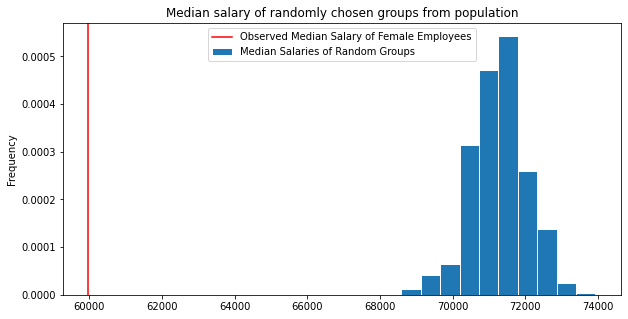

In [19]:
title='Median salary of randomly chosen groups from population'
pd.Series(medians).plot(kind='hist', density=True, ec='w', title=title);
plt.axvline(x=female_median, color='red')
plt.legend(['Observed Median Salary of Female Employees', 'Median Salaries of Random Groups']);

- Our hypothesis test has a p-value of 0, so we reject the null.
    - Under the assumption that gender is independent of salary, the chance of seeing a median salary this low is essentially 0.

<center><img src="imgs/DSLC.png" width="40%"></center>

### Even more questions...

While trying to answer one question, many more popped up.

* Is our dataset representative of all San Diego employees?
* How reliable is our name-to-gender assignment?
* How reliable is our join between `salaries` and `names`?
* Is the pay disparity between genders correlated to pay-type? Job status? Job type?
* What is the **cause** of the disparity?

### Is our dataset representative of all San Diego employees?

- In this case, yes – the dataset we downloaded from [Transparent California](https://transparentcalifornia.com/salaries/san-diego/) is a **census**, meaning that it accounts for all members of the population.
- But perhaps `'Total Pay'` is not the most relevant column, as it may include reimbursements that are separate from take-home pay (e.g. gas for driving a car).

### How reliable is our join between `salaries` and `names`?
* Are there names in the salaries dataset that aren't in the SSA dataset?
    - Who might not be in the SSA dataset? 
    - Could individuals with those names be biased towards certain salaries?
* Does the salaries dataset have a disproportionately large portion of unisex names?
* Is it better to use a subset of the SSA dataset (e.g. by state?)
    - Do the gender of names typically vary by geography?

### How reliable is our join between `salaries` and `names`?

In [20]:
salaries_with_gender[salaries_with_gender['gender'].isnull()]

,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency,Status,firstname,gender
23,Almis Xxxx,Asst Chief Oper Ofcr,201773.0,0.0,54824.00,33373.0,256597.0,289970.0,2020,NaN,San Diego,FT,Almis,NaN
40,Devinda Xxxx,Fire Battalion Chief,71905.0,133385.0,19829.00,42743.0,225119.0,267862.0,2020,NaN,San Diego,PT,Devinda,NaN
113,Teophilson Xxxx,Police Officer,117691.0,69222.0,32135.00,26281.0,219048.0,245329.0,2020,NaN,San Diego,FT,Teophilson,NaN
153,Tevar Xxxx,Police Officer,91773.0,88703.0,26850.00,27868.0,207326.0,235194.0,2020,NaN,San Diego,FT,Tevar,NaN
154,Junar Xxxx,Police Officer,36112.0,72625.0,101272.00,25179.0,210009.0,235188.0,2020,NaN,San Diego,PT,Junar,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12510,A Xxxx,Sanitation Driver 2,0.0,90.0,0.00,8.0,90.0,98.0,2020,NaN,San Diego,PT,A,NaN
12513,Ventice Xxxx,Plant Tech 3,0.0,90.0,0.00,5.0,90.0,95.0,2020,NaN,San Diego,PT,Ventice,NaN
12578,Anniessa Xxxx,Dispatcher 2,0.0,17.0,0.00,1.0,17.0,18.0,2020,NaN,San Diego,PT,Anniessa,NaN
12582,Navareto Xxxx,Plant Procs Cntrl Electrician,0.0,15.0,0.00,1.0,15.0,16.0,2020,NaN,San Diego,PT,Navareto,NaN


In [21]:
# Proportion of employees whose names aren't in SSA dataset
salaries_with_gender['gender'].isnull().mean()

0.03863546211820706

In [22]:
# Description of total pay by joined vs. not joined
(
    salaries_with_gender
    .assign(joined=salaries_with_gender['gender'].notnull())
    .groupby('joined')['Total Pay']
    .describe()
    .T
)

joined,False,True
count,487.000000,12118.000000
mean,68852.297741,75435.673378
std,47890.354528,49688.037713
min,4.000000,0.000000
25%,36723.500000,41348.250000
50%,63341.000000,71513.000000
75%,96587.000000,107389.250000
max,256597.000000,320699.000000


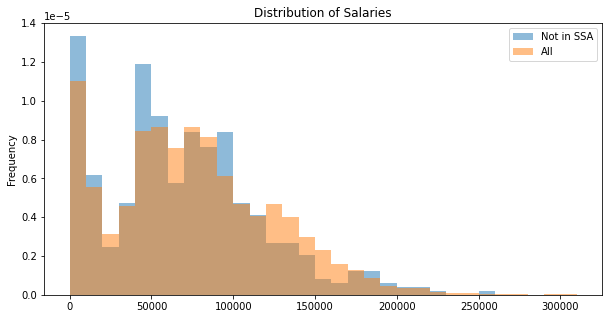

In [23]:
nonjoins = salaries_with_gender.loc[salaries_with_gender['gender'].isnull()]

title = 'Distribution of Salaries'
nonjoins['Total Pay'].plot(kind='hist', bins=np.arange(0, 320000, 10000), alpha=0.5, density=True, sharex=True)
salaries_with_gender['Total Pay'].plot(kind='hist', bins=np.arange(0, 320000, 10000), alpha=0.5, density=True, sharex=True, title=title)
plt.legend(['Not in SSA','All']);

### How reliable is our join between `salaries` and `names`?

**Lesson:** joining to another dataset can bias your sample! 

## Introduction to `pandas`

<center><img src='imgs/babypanda.jpg' width=400></center>

<center><img src='imgs/angrypanda.jpg' width=600></center>

### `pandas`

<center><img src='imgs/pandas.png' width=200></center>

- `pandas` is **the** Python library for tabular data manipulation.
- Before `pandas` was developed, the standard data science workflow involved using multiple languages (Python, R, Java) in a single project.
- Wes McKinney, the original developer of `pandas`, wanted a library which would allow everything to be done in Python.
    - Python is faster to develop in than Java, and is more production-capable than R.

### `pandas` data structures

There are three key data structures at the core of `pandas`:
- DataFrame: 2 dimensional tables.
- Series: 1 dimensional (columnar) array.
- Index: immutable sequence of column/row labels.

<center><img src='imgs/example-df.png' width=600></center>

### Importing `pandas` and related libraries

We've already run this at the top of the notebook, so we won't repeat it here. But `pandas` is almost always imported in conjunction with `numpy`:

```py
import pandas as pd
import numpy as np
```

### Series are "slices"
* Rows and columns of DataFrame are stored as `pd.Series`.
* A `pd.Series` object is a one-dimensional sequence with labels (index).

In [24]:
names

,firstname,gender,count,year
0,Jennifer,F,56780,1971
1,Michelle,F,33161,1971
2,Lisa,F,32911,1971
3,Kimberly,F,30700,1971
4,Amy,F,26237,1971
...,...,...,...,...
19695,Zaki,M,5,1982
19696,Zebulin,M,5,1982
19697,Zedekiah,M,5,1982
19698,Zubin,M,5,1982


In [25]:
names['firstname']

0        Jennifer
1        Michelle
2            Lisa
3        Kimberly
4             Amy
           ...   
19695        Zaki
19696     Zebulin
19697    Zedekiah
19698       Zubin
19699      Zuriel
Name: firstname, Length: 1399746, dtype: object

In [26]:
names.iloc[3]

firstname    Kimberly
gender              F
count           30700
year             1971
Name: 3, dtype: object

### Initializing a Series

- The function `pd.Series` can create a new Series, given either an existing sequence or dictionary.
- By default, the index will be set to 0, 1, 2, 3,... and the Series will have no "name".
    - You can use optional `index` and `name` arguments to change this behavior.

In [27]:
pd.Series([10, 23, 45, 53, 87])

0    10
1    23
2    45
3    53
4    87
dtype: int64

In [28]:
pd.Series({'a': 10, 'b': 23, 'c': 45, 'd': 53, 'e': 87}, name='people')

a    10
b    23
c    45
d    53
e    87
Name: people, dtype: int64

### Initializing a DataFrame

* `pd.DataFrame` initializes a DataFrame using either: 
    - a list of rows, or
    - a dictionary of columns.
* There are various optional arguments: `index`, `columns`, `dtype`, etc.
    - To see the signature of a function `f`, run `f?` in a cell (e.g. `pd.DataFrame?`).

In [29]:
pd.DataFrame?

### Method 1: Using a list of rows

In [30]:
row_data = [
    ['Granger, Hermione', 'A13245986', 1],
    ['Potter, Harry', 'A17645384', 1],
    ['Weasley, Ron', 'A32438694', 1],
    ['Longbottom, Neville', 'A52342436', 1]
]

row_data

[['Granger, Hermione', 'A13245986', 1],
 ['Potter, Harry', 'A17645384', 1],
 ['Weasley, Ron', 'A32438694', 1],
 ['Longbottom, Neville', 'A52342436', 1]]

By default, the column names are set to 0, 1, 2, ...

In [31]:
pd.DataFrame(row_data)

,0,1,2
0,"Granger, Hermione",A13245986,1
1,"Potter, Harry",A17645384,1
2,"Weasley, Ron",A32438694,1
3,"Longbottom, Neville",A52342436,1


You can change that using the `columns` argument.

In [32]:
pd.DataFrame(row_data, columns=['Name', 'PID', 'LVL'])

,Name,PID,LVL
0,"Granger, Hermione",A13245986,1
1,"Potter, Harry",A17645384,1
2,"Weasley, Ron",A32438694,1
3,"Longbottom, Neville",A52342436,1


### Method 2: Using a dictionary of columns

In [33]:
column_dict = {
    'Name': ['Granger, Hermione', 'Potter, Harry', 'Weasley, Ron', 'Longbottom, Neville'],
    'PID': ['A13245986', 'A17645384', 'A32438694', 'A52342436'],
    'LVL': [1, 1, 1, 1]
}
column_dict

{'Name': ['Granger, Hermione',
  'Potter, Harry',
  'Weasley, Ron',
  'Longbottom, Neville'],
 'PID': ['A13245986', 'A17645384', 'A32438694', 'A52342436'],
 'LVL': [1, 1, 1, 1]}

In [34]:
enrollments = pd.DataFrame(column_dict)
enrollments

,Name,PID,LVL
0,"Granger, Hermione",A13245986,1
1,"Potter, Harry",A17645384,1
2,"Weasley, Ron",A32438694,1
3,"Longbottom, Neville",A52342436,1


### DataFrame index and column labels

- Access column labels with the `columns` attribute.
- Access index labels with the `index` attribute.
- The default for both is 0-indexed position (0, 1, 2, ...).

In [35]:
enrollments.columns

Index(['Name', 'PID', 'LVL'], dtype='object')

In [36]:
enrollments.index

RangeIndex(start=0, stop=4, step=1)

### Axis

- The rows and columns of a DataFrame are both stored as Series.
- The **axis** specifies the direction of a slice of a DataFrame.

<center><img src='imgs/axis.png' width=300></center>

- Axis 0 refers to the index.
- Axis 1 refers to the columns.

### DataFrame methods with `axis`

In [37]:
A = pd.DataFrame([[1, 2, 3], [4, 5, 6]], columns=['A', 'B', 'C'])
A

,A,B,C
0,1,2,3
1,4,5,6


If we specify `axis=0`, `A.sum` will "compress" along axis 0, and keep the column labels intact.

In [38]:
A.sum(axis=0)

A    5
B    7
C    9
dtype: int64

If we specify `axis=1`, `A.sum` will "compress" along axis 1, and keep the row labels (index) intact.

In [39]:
A.sum(axis=1)

0     6
1    15
dtype: int64

<center><img src='imgs/axis-sum.png' width=600></center>

## Selecting rows and columns using `[]` and `loc`

### Throwback to `babypandas` 👶

- In `babypandas`, you accessed columns using the `.get` method.
- `.get` also works in `pandas`, but it is not **idiomatic** – people don't usually use it.

In [40]:
enrollments

,Name,PID,LVL
0,"Granger, Hermione",A13245986,1
1,"Potter, Harry",A17645384,1
2,"Weasley, Ron",A32438694,1
3,"Longbottom, Neville",A52342436,1


In [41]:
enrollments.get('Name')

0      Granger, Hermione
1          Potter, Harry
2           Weasley, Ron
3    Longbottom, Neville
Name: Name, dtype: object

In [42]:
# Doesn't error
enrollments.get('billy')

### Selecting columns with `[]`

- The standard way to access a column in `pandas` is by using the `[]` operator.
    - Think of a DataFrame as a dictionary of arrays!
* Specifying a column name returns the column as a Series.
* Specifying a list of column names returns a DataFrame.

In [43]:
enrollments

,Name,PID,LVL
0,"Granger, Hermione",A13245986,1
1,"Potter, Harry",A17645384,1
2,"Weasley, Ron",A32438694,1
3,"Longbottom, Neville",A52342436,1


In [44]:
# Returns a Series
enrollments['Name']

0      Granger, Hermione
1          Potter, Harry
2           Weasley, Ron
3    Longbottom, Neville
Name: Name, dtype: object

In [45]:
# Returns a DataFrame
enrollments[['Name', 'PID']]

,Name,PID
0,"Granger, Hermione",A13245986
1,"Potter, Harry",A17645384
2,"Weasley, Ron",A32438694
3,"Longbottom, Neville",A52342436


In [46]:
# 🤔
enrollments[['Name']]

,Name
0,"Granger, Hermione"
1,"Potter, Harry"
2,"Weasley, Ron"
3,"Longbottom, Neville"


In [47]:
# KeyError
enrollments['billy']

KeyError: 'billy'

### Selecting columns with attribute notation

- It is also possible to access columns using attribute notation, i.e. `.<column name>`.
- **Don't do this.**
    - What if the column name clashes with a DataFrame method, like `.mean`?
    - What if the column name contains spaces or special characters?

In [ ]:
enrollments.LVL

In [ ]:
enrollments.mean

### Selecting rows with `loc`

If `df` is a DataFrame, then:
* `df.loc[idx]` returns the Series whose index is `idx`.
* `df.loc[idx_list]` returns a DataFrame containing the rows whose indexes are in `idx_list`.

In [ ]:
enrollments

In [ ]:
enrollments.loc[3]

In [ ]:
enrollments.loc[[1, 3]]

In [ ]:
enrollments.loc[[3]]

### Boolean sequence selection

* The `loc` operator also supports Boolean sequences (lists, arrays, Series) as input. 
* The length of the sequence must be the same as the number of rows in the DataFrame. 
* The result is a filtered DataFrame, containing only the rows in which the sequence contained `True`.

In [ ]:
enrollments

In [ ]:
bool_arr = [
    False,  # Hermione
    True,   # Harry
    False,  # Ron
    True    # Neville
]

enrollments.loc[bool_arr]

### Querying

- Comparisons with arrays (Series) result in Boolean arrays (Series).
- We can use comparisons along with the `loc` operator to **query** a DataFrame.
- Querying is the act of selecting rows in a DataFrame that satisfy certain condition(s).

In [ ]:
enrollments

In [ ]:
enrollments['Name'].str.contains('on')

In [ ]:
# Rows where Name includes 'on'
enrollments.loc[enrollments['Name'].str.contains('on')]

In [ ]:
# Rows where the first letter of Name is between A and L
enrollments.loc[enrollments['Name'] < 'M']

When using a Boolean sequence, e.g. `enrollments['Name'] < 'M'`, `loc` is not strictly necessary:

In [ ]:
enrollments[enrollments['Name'] < 'M']

### Selecting columns and rows simultaneously

So far, we used `[]` to select columns and `loc` to select rows.

In [ ]:
enrollments.loc[enrollments['Name'] < 'M']['PID']

### Selecting columns and rows simultaneously

`loc` can also be used to select both rows and columns. The general pattern is:

```
df.loc[<row selector>, <column selector>]
```

Examples:
- `df.loc[idx_list, col_list]` returns a DataFrame containing the rows in `idx_list` and columns in `col_list`.
- `df.loc[bool_arr, col_list]` returns a DataFrame contaning the rows for which `bool_arr` is `True` and columns in `col_list`.
- If `:` is used as the first input, all rows are kept. If `:` is used as the second input, all columns are kept.

In [ ]:
enrollments

In [ ]:
enrollments.loc[enrollments['Name'] < 'M', 'PID']

In [ ]:
enrollments.loc[enrollments['Name'] < 'M', ['PID']]

### Even more ways of selecting rows and columns

In `df.loc[<row selection>, <column selection>]`:

- Both the first and second inputs can be Boolean sequences.
- Both the first and second inputs can be **slices**, which use `:` syntax (e.g. `0:2`, `'Name': 'PID'`).
- If both the first and second inputs are primitives (strings or numbers), the result is a single value, not a DataFrame or Series.
- The first input can be a **function** that takes a row as input and returns a Boolean.

There are many, many more – see the [`pandas` documentation](https://pandas.pydata.org/docs/user_guide/index.html#user-guide) for more.

In [ ]:
enrollments

In [ ]:
enrollments.loc[2, 'LVL']

In [ ]:
enrollments.loc[0:2, 'Name': 'PID']

### Don't forget `iloc`!

- `iloc` stands for "integer location".
- `iloc` is like `loc`, but it selects rows and columns based off of integer positions only.

In [ ]:
enrollments

In [ ]:
enrollments.iloc[2:4, 0:2]

In [ ]:
other = enrollments.set_index('Name')
other

In [ ]:
other.iloc[2]

In [ ]:
other.loc[2]

### Discussion Question

Let's return to the `names` DataFrame.

In [ ]:
names

**Question:** How many babies were born with the name `'Billy'` and gender `'M'`?

In [ ]:
...

### More Practice

Consider the DataFrame below.

In [ ]:
jack = pd.DataFrame({1: ['fee', 'fi'], '1': ['fo', 'fum']})
jack

For each of the following pieces of code, predict what the output will be. Then, uncomment the line of code and see for yourself.

In [ ]:
# jack[1]

In [ ]:
# jack[[1]]

In [ ]:
# jack['1']

In [ ]:
# jack[[1,1]]

In [ ]:
# jack.loc[1]

In [ ]:
# jack.loc[jack[1] == 'fo']

In [ ]:
# jack[1, ['1', 1]]

In [ ]:
# jack.loc[1,1]

## Summary, next time

### Summary

- `pandas` is **the** library for tabular data manipulation in Python.
- There are three key data structures in `pandas`: DataFrame, Series, and Index.
- Refer to the lecture notebook and the [`pandas` documentation](https://pandas.pydata.org/docs/user_guide/index.html#user-guide) for tips.
- **Next time:** useful methods for working with DataFrames and Series.